In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
import geopandas as gpd
import seaborn as sns


##First approach to the dataframe

In [5]:
cars_df = pd.read_csv('cars_info.csv')
cars_df.head()


,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,11530130,2010 Toyota Rukus Build 2 AZE151R,9999,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
1,12190570,2021 Mercedes-Benz V 250 D Avantgarde MWB 447 ...,117990,Mercedes-Benz,V,250 D Avantgarde MWB,447 MY21,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7
2,12321855,2021 Mercedes-Benz Valente 116 CDI MWB RWD 447...,79990,Mercedes-Benz,Valente,116 CDI MWB RWD,447 MY21,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
3,12346971,2010 Mercedes-Benz E250 CDI Avantgarde 207,34990,Mercedes-Benz,E250,CDI Avantgarde,207,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,12363884,2016 Holden Cruze CD JH MY16,15990,Holden,Cruze,CD,JH MY16,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5


In [6]:
print(cars_df.describe())
print(cars_df.dtypes)

print(len(cars_df))



                 ID          Price          Year    Kilometers            CC  \
count  1.704800e+04   17048.000000  17048.000000  1.704800e+04  17048.000000   
mean   1.279027e+07   36772.234925   2015.481288  1.032314e+05   2491.830303   
std    5.051111e+04   30301.178583      4.721591  8.041313e+04    881.985562   
min    1.153013e+07    1000.000000   1989.000000  1.000000e+00    875.000000   
25%    1.275715e+07   18800.000000   2013.000000  4.450225e+04   1987.000000   
50%    1.280207e+07   29990.000000   2016.000000  8.845400e+04   2354.000000   
75%    1.283131e+07   45990.000000   2019.000000  1.488735e+05   2981.000000   
max    1.285246e+07  999000.000000   2022.000000  2.700000e+06   7300.000000   

       Seating Capacity  
count      17048.000000  
mean           5.115849  
std            1.121791  
min            2.000000  
25%            5.000000  
50%            5.000000  
75%            5.000000  
max           14.000000  
ID                   int64
Name              

##Finding the top 5 of the most sold car Brands

Brand
Toyota     2768
Holden     1505
Ford       1490
Mazda      1167
Hyundai    1087
Name: count, dtype: int64


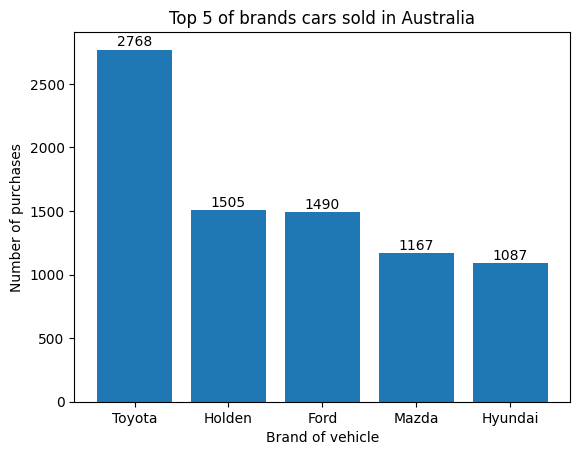

count     33.000000
mean      83.878788
std      132.336398
min        1.000000
25%        2.000000
50%        9.000000
75%      143.000000
max      542.000000
Name: count, dtype: float64
Model
Hilux                    542
Corolla                  356
RAV4                     307
Landcruiser Prado        265
Camry                    233
Kluger                   232
Landcruiser              207
Hiace                    153
Yaris                    143
C-HR                      60
Landcruiser 70 Series     53
Fortuner                  49
Aurion                    41
86                        31
Tarago                    25
Yaris Cross               22
Name: count, dtype: int64


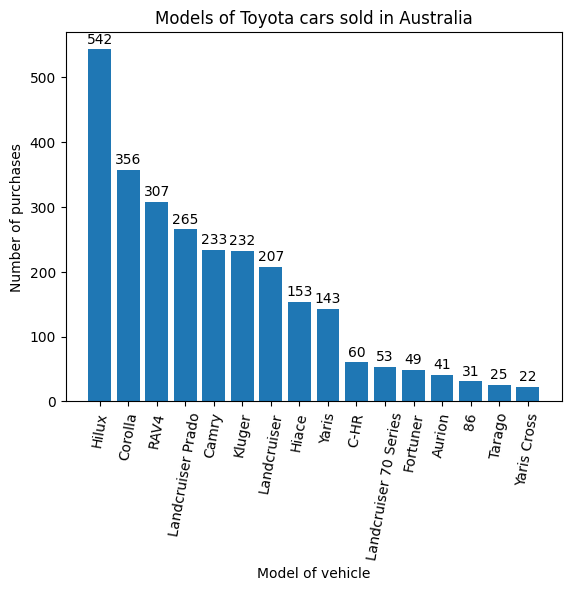

In [7]:
#Top 5 of the most sold car Brands.

cars_dups = cars_df['Brand'].value_counts()

most_cars_sold = cars_dups.sort_values(ascending=False).head(5)

print(most_cars_sold)
plt.bar(most_cars_sold.index,most_cars_sold.values)
#plt.xticks(rotation=80)

for i, value in enumerate(most_cars_sold.values):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')

plt.xlabel('Brand of vehicle')
plt.ylabel('Number of purchases')
plt.title('Top 5 of brands cars sold in Australia')
plt.show()

##Now let's focus on Toyota.

Toyota_cars = cars_df[cars_df['Brand'] == 'Toyota']['Model'].value_counts()
print(Toyota_cars.describe())

##Filtering models according to second quartile = 9
Toyota_cars = Toyota_cars[Toyota_cars.values >9]
print(Toyota_cars)
##Plotting Toyota cars by models
plt.bar(Toyota_cars.index,Toyota_cars.values)
plt.xticks(rotation=80)

for i, value in enumerate(Toyota_cars.values):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')

plt.xlabel('Model of vehicle')
plt.ylabel('Number of purchases')
plt.title('Models of Toyota cars sold in Australia')
plt.show()



##Comparing variation of each specific vehicle.

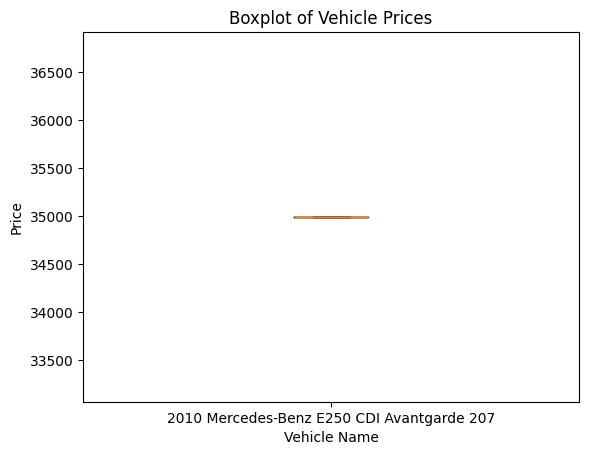

In [8]:

##defining a function where we can analyze an specific vehicle.
def vehicle_variation(name):
    plt.boxplot(cars_df[cars_df['Name'] == name]['Price'])
    plt.xticks([1],[name])
    plt.xlabel('Vehicle Name')
    plt.ylabel('Price')
    plt.title('Boxplot of Vehicle Prices')
    plt.show()

vehicle_variation('2010 Mercedes-Benz E250 CDI Avantgarde 207')


Now le'ts check which continent is the king in Australia.
I wan to agroup the brands per continents and then plot a warm graph.

In [9]:
##Agrouping Brands per continent.

# List of brands
brands = ['Toyota', 'Mercedes-Benz', 'Holden', 'Nissan', 'Ford', 'BMW', 'Isuzu', 'Hyundai',
          'Volkswagen', 'Lexus', 'Mazda', 'Audi', 'Subaru', 'Mitsubishi', 'Kia', 'Skoda',
          'Renault', 'Porsche', 'Jeep', 'Honda', 'Ssangyong', 'Volvo', 'Land Rover', 'MG',
          'Suzuki', 'Ram', 'Mini', 'Jaguar', 'LDV', 'HSV', 'Alfa Romeo', 'Aston Martin',
          'Hino', 'Chrysler', 'Citroen', 'Infiniti', 'Peugeot', 'Chevrolet',
          'Lamborghini', 'Fiat', 'Bentley', 'Dodge', 'Haval', 'Great Wall', 'Abarth',
          'Foton', 'Genesis', 'GWM', 'FPV', 'Mitsubishi Fuso', 'Maserati', 'Iveco',
          'Mahindra', 'Opel', 'Saab', 'Chery', 'Smart', 'Proton', 'Cupra']

# Continents for each brand based on origin
continents = ['Asia', 'Europe', 'Oceania', 'Asia', 'North America', 'Europe', 'Asia', 'Asia',
              'Europe', 'Asia', 'Asia', 'Europe', 'Asia', 'Asia', 'Asia', 'Europe',
              'Europe', 'Europe', 'North America', 'Asia', 'Asia', 'Europe', 'Europe', 'Asia',
              'Asia', 'North America', 'Europe', 'Europe', 'Asia', 'Oceania', 'Europe', 'Europe',
              'Asia', 'North America', 'Europe', 'Asia', 'Europe', 'North America',
              'Europe', 'Europe', 'Europe', 'North America', 'Asia', 'Asia', 'Europe',
              'Asia', 'Asia', 'Asia', 'Asia', 'Europe', 'Europe', 'Asia',
              'Asia', 'Europe', 'Europe', 'Asia', 'Asia', 'Asia', 'Europe']

# Create DataFrame
brands_df = pd.DataFrame({'Brand': brands, 'Continent': continents})
brands_df

merge_df = pd.merge(cars_df[['Brand','Price']],brands_df,how='left')
merge_df

merge_df_count = merge_df['Continent'].value_counts()
merge_df_count

#print(max(merge_df_count.values))


Continent
Asia             9839
Europe           3712
North America    1955
Oceania          1542
Name: count, dtype: int64

#Now let's check how the kms affect the price.

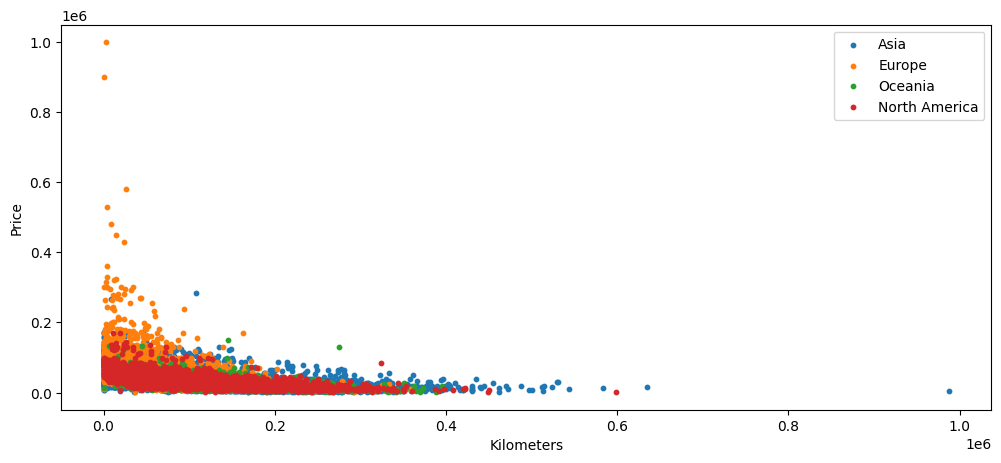

In [13]:
#Plotting kms vs price
continents_unique = brands_df['Continent'].unique()
kms_price = pd.merge(cars_df,brands_df,how='inner')
kms_price

#I've realized that there is an outlier not typical of a car with more than 2 million of kms. I will adjust those kms cause doesn't make sense.
plt.figure(figsize=(12,5))
for i in continents_unique:
    kms_price_i = kms_price[(kms_price['Continent'] == i) & (kms_price['Kilometers'] <= 1000000)][['Kilometers','Price']]
    #print(kms_price)
    plt.scatter(kms_price_i['Kilometers'],kms_price_i['Price'],s=10,label=i)
plt.legend()
plt.xlabel('Kilometers')
plt.ylabel('Price')
plt.show()

#print(brands_df)

In [ ]:
print(cars_df[cars_df['Kilometers']  > 900000])

             ID                                     Name  Price   Brand  \
5919   12776591  2002 Toyota Corolla Ascent Seca ZZE122R   5000  Toyota   
16662  12849595            2004 Holden Rodeo LT (4X4) RA  11000  Holden   

         Model      Variant   Series  Year  Kilometers             Type  \
5919   Corolla  Ascent Seca  ZZE122R  2002      987475        Hatchback   
16662    Rodeo     LT (4X4)       RA  2004     2700000  Crew Cab Pickup   

      Gearbox             Fuel Status    CC  Color  Seating Capacity  
5919   Manual  Unleaded Petrol   Used  1794  Black                 5  
16662  Manual  Unleaded Petrol   Used  3494  White                 5  


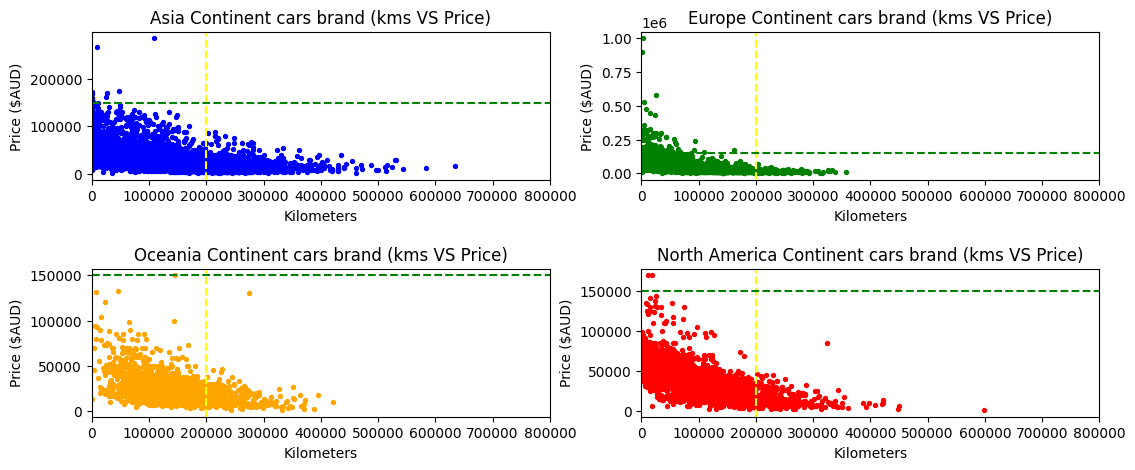

In [19]:
plt.figure(figsize=(13,5))

color = ['blue','green','orange','red']
for i in range(1,5):
    
    c=continents_unique[i-1]
    plt.subplot(2,2,i)
    kms_price_i = kms_price[kms_price['Continent'] == c][['Kilometers','Price']]
    plt.scatter(kms_price_i['Kilometers'],kms_price_i['Price'],s=8,c=color[i-1])
    plt.axvline(x=200000, color='yellow', linestyle='--')
    plt.axhline(y=150000, color='green', linestyle='--')
    plt.xlim(0,800000)
    #plt.ylim(0,1000000)
    plt.title(str(c)+' Continent cars brand (kms VS Price)')
    plt.xlabel('Kilometers')
    plt.ylabel('Price ($AUD)')
    
    plt.subplots_adjust(hspace=0.6)

plt.show()




The graph above shows the variation in terms of price and mileage according to each brands' continent.
Asian brands experiment wide high kilometers and their prices in most of the cases not exceeding $200.000. On the other hand the European brands show the opposite trend with a very low kilometers and prices higher than $500.000. The other two continents in mention show a similar behaviour.



Now, lets have a look on the next hypothesis:
Usually the cars with a mecanic gearbox is cheaper than cars with automatic gearbox:
Ho: The gearbox type has no effect on car price. (The average price of manual and automatic cars is the same.)
H1:  The gearbox type does affect car price. (The average prices are different.)

C:\Users\pipec\AppData\Local\Temp\ipykernel_50372\1866129415.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(x,labels=['Manual Gearbox','Automatic Gearbox'])


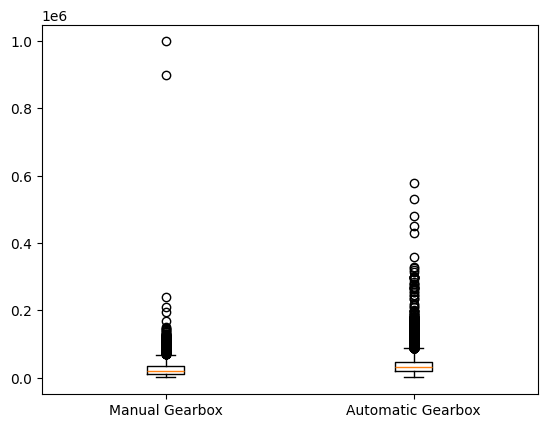

In [22]:

#Cleaning and Separating the data

price_auto= cars_df[cars_df['Gearbox']=='Automatic']['Price']
price_manual= cars_df[cars_df['Gearbox']=='Manual']['Price']

#plotting box plots of each gearbox type

x = [price_manual,price_auto]
plt.boxplot(x,labels=['Manual Gearbox','Automatic Gearbox'])
plt.show()




Automatic Gearbox: IQR = 27195.0, Q1= 19990.0, Q3= 47185.0
Manual Gearbox: IQR = 23008.75, Q1= 11990.0, Q3= 34998.75


C:\Users\pipec\AppData\Local\Temp\ipykernel_50372\2215262200.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(x,labels=['Manual Gearbox','Automatic Gearbox'])


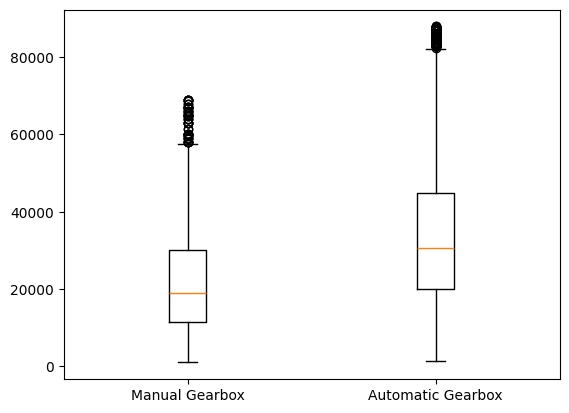

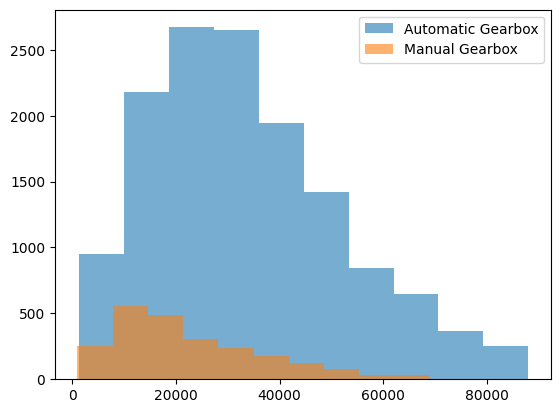

Shapiro Test (Manual): ShapiroResult(statistic=0.9218977689743042, pvalue=7.300926352664117e-33)
Shapiro Test (Automatic): ShapiroResult(statistic=0.9572847485542297, pvalue=0.0)
Levene's Test: LeveneResult(statistic=159.78674232105743, pvalue=1.8721263843491838e-36)
Mann-Whitney U Statistic: 9959886.5
P-value: 2.6380083195758295e-180
The difference in prices between manual and automatic cars is statistically significant so we can reject the null hypothesis.


c:\Users\pipec\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [23]:
from scipy.stats import iqr
#According to the graph above we need to remove outliers. I'll use the IQR method to do that.
IQR_auto = iqr(price_auto)
Q1_auto = np.quantile(price_auto,0.25)
Q3_auto = np.quantile(price_auto,0.75)

IQR_manual = iqr(price_manual)
Q1_manual = np.quantile(price_manual,0.25)
Q3_manual = np.quantile(price_manual,0.75)

print('Automatic Gearbox: IQR = '+ str(IQR_auto)+ ', Q1= '+str(Q1_auto)+ ', Q3= '+str(Q3_auto))
print('Manual Gearbox: IQR = '+ str(IQR_manual)+ ', Q1= '+str(Q1_manual)+ ', Q3= '+str(Q3_manual))

#Setting limits to remove outliers according to the IQR:
top_limit_auto= Q3_auto + 1.5*IQR_auto
botton_limit_auto= Q1_auto - 1.5*IQR_auto

top_limit_manual= Q3_manual + 1.5*IQR_manual
botton_limit_manual= Q1_manual - 1.5*IQR_manual
#Redefining data
price_auto= cars_df[(cars_df['Gearbox']=='Automatic')& (cars_df['Price'] <=top_limit_auto) & (cars_df['Price'] >= botton_limit_auto)]['Price']
price_manual= cars_df[(cars_df['Gearbox']=='Manual')& (cars_df['Price'] <=top_limit_manual) & (cars_df['Price'] >= botton_limit_manual)]['Price']

#Now, let's plot again our boxplot :)
x = [price_manual,price_auto]
plt.boxplot(x,labels=['Manual Gearbox','Automatic Gearbox'])
plt.show()

#plotting histograms of each gearboxtype
plt.hist(price_auto,alpha = 0.6,label='Automatic Gearbox')
plt.hist(price_manual, alpha = 0.6,label='Manual Gearbox')
plt.legend()
plt.show() #We can see the significant difference between automatic and manual gearboxes.

#checking assumptions to test Ho.

from scipy.stats import shapiro, levene

# Normality test (Shapiro-Wilk)
print("Shapiro Test (Manual):", shapiro(price_manual))
print("Shapiro Test (Automatic):", shapiro(price_auto))

# Variance test (Levene's Test)
print("Levene's Test:", levene(price_manual, price_auto)) #The Shapiro test said the distributions are not normal and the variances of each dataset is not the same (p-value < 0.05)

#According to these results, the Mann-Whitney U test sounds suitable to test our Ho.
from scipy.stats import mannwhitneyu

u_statistic, p_value = mannwhitneyu(price_manual, price_auto, alternative='two-sided')

# Print the results
print(f"Mann-Whitney U Statistic: {u_statistic}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The difference in prices between manual and automatic cars is statistically significant so we can reject the null hypothesis.")
else:
    print("There is no statistically significant difference in prices between manual and automatic cars.")

#In conclusion, There is strong evidence to confirm that the gearbox type affect the price of every car.

Color
White     6262
Silver    2485
Grey      2457
Black     1997
Blue      1588
Red       1170
Gold       172
Orange     155
Green      140
Brown      138
Name: count, dtype: int64


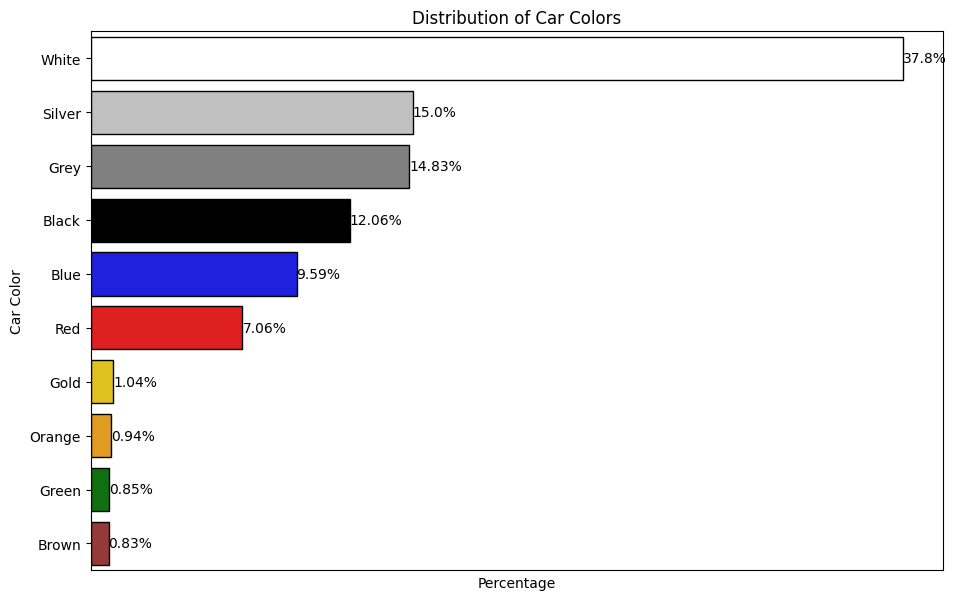

In [ ]:
#Now let's check what is the top 3 colors vehicle in Australia
colors_standard=cars_df['Color'].str.capitalize() #Capitalizing all values to don't lose info ('Blue','blue','BLUE')
colors_df = colors_standard.value_counts().head(10)
print(colors_df)

sum = 0
for i in colors_df.values:
    sum = sum + i

# Create a dictionary mapping color names to actual colors
color_map = {
    'White': 'white',
    'Black': 'black',
    'Blue': 'blue',
    'Red': 'red',
    'Green': 'green',
    'Gold': 'gold',
    'Gray': 'gray',
    'Silver': 'silver',
    'Grey': 'grey',
    'Orange': 'orange',
    'Brown': 'brown'
}

# Generate a list of colors for the bars based on the dataset's color names
bar_colors = [color_map.get(color, 'gray') for color in colors_df.index]  # Default to gray if color is missing


plt.figure(figsize=(11,7))
ax = sns.barplot(
    x=colors_df.values, 
    y=colors_df.index, 
    palette= bar_colors, 
    edgecolor="black"
)
for i, value in enumerate(colors_df.values):
    ax.text(value + 0.5, i, str(round(value/sum*100,2))+'%', color='black', va='center', fontsize=10)


ax.set_xticks([])
plt.xlabel("Percentage")
plt.ylabel("Car Color")
plt.title("Distribution of Car Colors")
plt.show()

